In [16]:
# loading sound files 
import glob
import scipy.fftpack
path = (glob.glob("datasets/ddp/*.wav"))

In [21]:
def sound(loc):
    from scipy.io import wavfile as wav
    import numpy as np
    rate, data = wav.read(loc)
    import matplotlib.pyplot as plt
   
    # beat detection 
    # roughly the brake liner is tapped more than 10 times at different locations
        #to capture acoustic signals at different locations of brake liner
    
    threshold = 3000
    beat = []
    i = 0
    while i < len(data):
        if abs(data[i]) >= threshold:
            beat.append(i)
            i = i+10000
        i+=1
    total_beats = len(beat) # finding total no of beats at one test
    print(loc)
    
    def maximum(array = None): # finding the frequency at which maximum value of frequency is obtained
        length = p+q
        freq = (rate/2)*(np.linspace(0,1,int(length/2)))
        fft_sig = abs(np.fft.fft(array))
        dim = int(length/2)
        idx = np.argmax(fft_sig[25:dim])
        return [idx,max(fft_sig)]
    
    #window or binning 
    p = 1000
    q = 6000
    beats = []
    for i in range(total_beats):
        beats.append(data[(beat[i]-p):(beat[i]+q)])
    
    result = []
    final_result = []
    for array in beats:
        if len(array) == p+q:
            result.append(maximum(array)) # appending all tap sounds of brake liner
            
    final_result = np.array(result)
    if len(final_result)> 10:
        from sklearn.cluster import DBSCAN
        from sklearn import preprocessing
        scaler = preprocessing.StandardScaler().fit(final_result) # normalizing the data 
        final_result2 = scaler.transform(final_result)
        clf = DBSCAN( eps = 0.5, min_samples= 5 ) # using density based cluseter 
        clf.fit(final_result2)
        labels = clf.labels_ 
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        print("no. of clusters is", n_clusters_)
        plt.scatter(final_result2[:,0], final_result2[:,1],c=labels.astype(np.float))
        plt.xlim(-10,10)
        plt.show() 

datasets/ddp\bad_brake_liner.wav
no. of clusters is 2


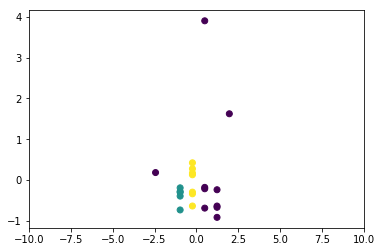

datasets/ddp\good_brake_liner.wav
no. of clusters is 1


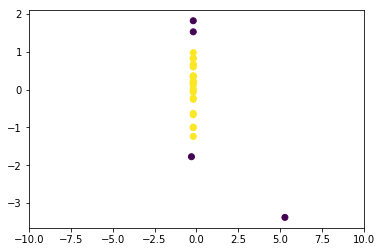

In [22]:
# passing the sound function to all the datasets
# here just two samples are taken for the test
for directory in path:
    sound(directory)